<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/retail_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing all needed library for analysis

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set(style='whitegrid')


In [2]:
from google.colab import files


uploaded = files.upload()


2. Loading the file and analyzing the structure of the file.

In [7]:

df_sales = pd.read_csv('retail_sales_dataset.csv')

df_sales.head(20)




,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


4.Cleaning the dataset.

In [10]:

df_sales.drop_duplicates(inplace=True)

df_sales = df_sales.dropna()

df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')

df_sales = df_sales.dropna(subset=['Date'])

df_sales.reset_index(drop=True, inplace=True)


5. Confirming if the dataset is clean.

In [12]:
df_sales.info()
df_sales.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


6. Calculating Descriptive Statistics like mean, median, mode and std.

In [18]:

print("Mean:\n", df_sales[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean())
print("\nMedian:\n", df_sales[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median())
print("\nMode:\n", df_sales[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode().iloc[0])
print("\nStandard Deviation:\n", df_sales[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std())


Mean:
 Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

Standard Deviation:
 Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


7. Doing Time series Analysis.

<ipython-input-21-450026567e39>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_sales['Total Amount'].resample('M').sum()


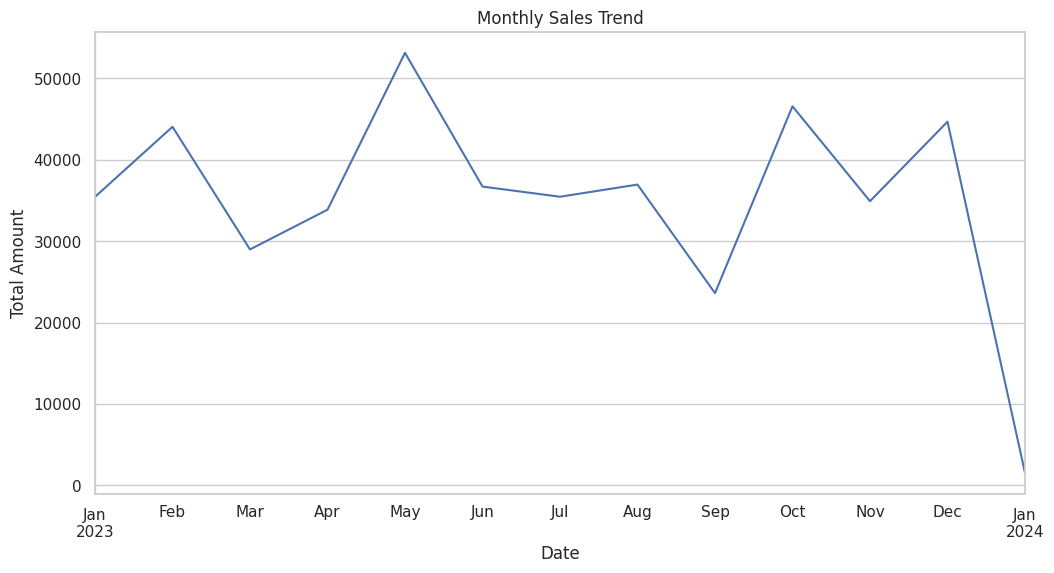

In [21]:
# Set date as index
#df_sales.set_index('Date', inplace=True)

# Resample sales monthly
monthly_sales = df_sales['Total Amount'].resample('M').sum()

# Plot
monthly_sales.plot(figsize=(12, 6), title='Monthly Sales Trend')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.show()


8.Customer and Product Analysis

8.1 Top Customers by Total Spending

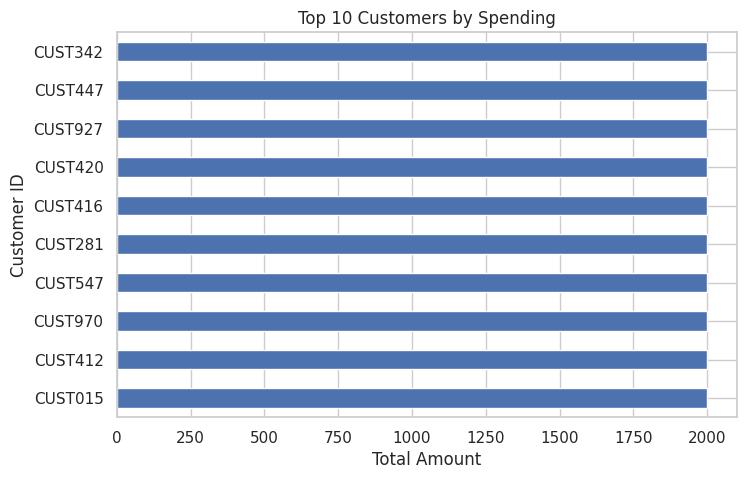

In [22]:
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Spending', figsize=(8, 5))
plt.xlabel('Total Amount')
plt.show()


8.2  Top Product Categories

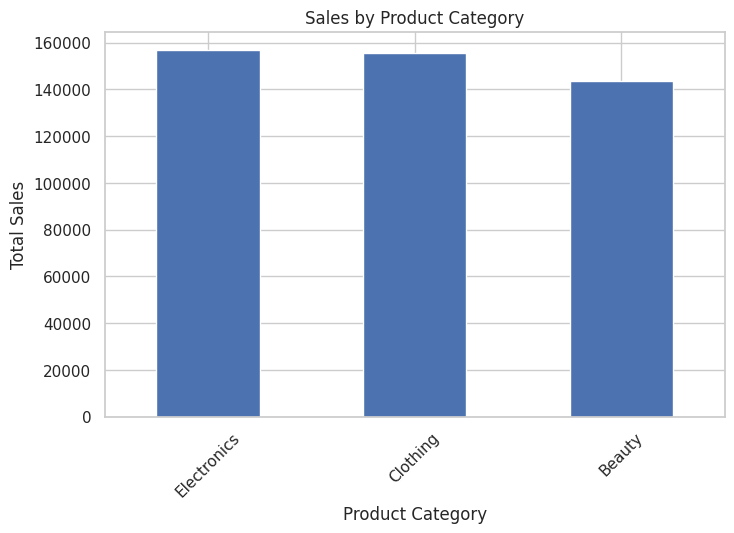

In [24]:
top_products = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', title='Sales by Product Category', figsize=(8, 5))
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


8.3 Gender-wise Spending.

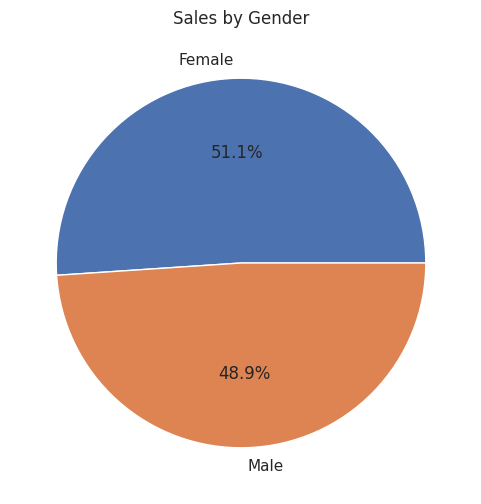

In [25]:
gender_sales = df_sales.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender', figsize=(6, 6))
plt.ylabel('')
plt.show()


9. Visualization

9.1 Sales Distribution

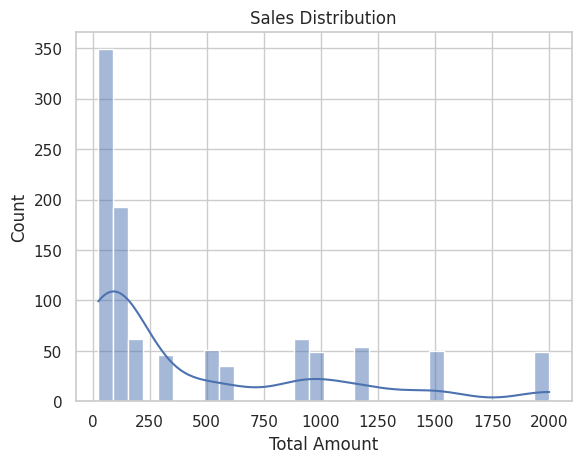

In [27]:
sns.histplot(df_sales['Total Amount'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()


9.2 Heatmap of Correlation

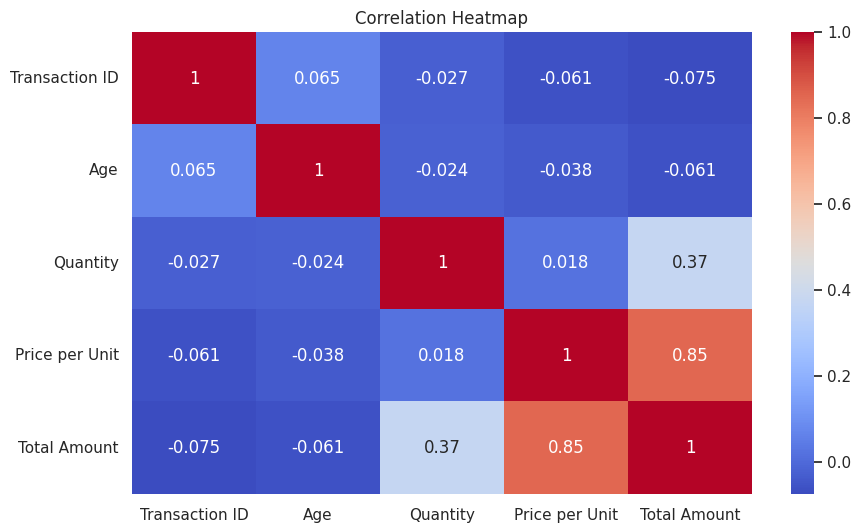

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


10. Recommendations


1.Focus on top 2-3 product categories that generate the most revenue.

2.Target male/female customers with personalized offers based on spending.

3.Identify age groups that spend the most and tailor marketing campaigns.

4.Analyze slow months from the time series and offer discounts to boost sales.